In [1]:
import warnings

import numpy as np

warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from pyproj import Geod
sns.set_style("whitegrid")

In [2]:
jersey_city = pd.read_csv("data/NYC-BikeShare-2015-2017-combined.csv")
jersey_city = jersey_city.drop(jersey_city[jersey_city['Trip Duration'] < 90].index)
jersey_city['Start Date'] = pd.to_datetime(jersey_city['Start Time']).dt.date
jersey_city['Start Date'] = pd.to_datetime(jersey_city['Start Date'])
ntd_jersey_city = jersey_city.groupby("Start Date")["Start Date"].agg(["count"]).reset_index()
ntd_jersey_city.columns = ["Date", "Trips"]
atpd_jersey_city = round(ntd_jersey_city["Trips"].mean())



philadelphia = pd.read_csv("data/Indego_Trips_2016Q2.csv")
philadelphia = philadelphia.drop(philadelphia[philadelphia['duration'] < 90].index)
philadelphia = philadelphia.drop(philadelphia[(philadelphia['start_lat'] == 0) | (philadelphia['start_lon'] == 0) | (philadelphia['end_lat'] == 0) | (philadelphia['end_lon'] == 0)].index)
philadelphia['start_date'] = pd.to_datetime(philadelphia['start_time']).dt.date
philadelphia['start_date'] = pd.to_datetime(philadelphia['start_date'])
ntd_philadelphia = philadelphia.groupby("start_date")["start_date"].agg(["count"]).reset_index()
ntd_philadelphia.columns = ["Date", "Trips"]
atpd_philadelphia = round(ntd_philadelphia["Trips"].mean())



chicago = pd.read_csv("data/E-Scooter_Trips_-_2020.csv")
chicago["Trip Duration"] = chicago["Trip Duration"].str.replace(",", "")
chicago["Trip Duration"] = chicago["Trip Duration"].astype("int")
chicago["Trip Distance"] = chicago["Trip Distance"].str.replace(",", "")
chicago["Trip Distance"] = chicago["Trip Distance"].astype("int")
chicago = chicago.drop(chicago[(chicago['Trip Distance'] < 150) | (chicago['Trip Duration'] < 90)].index)
chicago['Start Date'] = pd.to_datetime(chicago['Start Time']).dt.date
chicago['Start Date'] = pd.to_datetime(chicago['Start Date'])
ntd_chicago = chicago.groupby("Start Date")["Start Date"].agg(["count"]).reset_index()
ntd_chicago.columns = ["Date", "Trips"]
atpd_chicago = round(ntd_chicago["Trips"].mean())


louisville = pd.read_csv("data/DocklessTripOpenData_9.csv")
louisville = louisville.drop(louisville[(louisville['TripDistance'] < 0.15) | (louisville['TripDuration'] < 1.5)].index)
louisville['StartDate'] = pd.to_datetime(louisville['StartDate'])
ntd_louisville = louisville.groupby("StartDate")["StartDate"].agg(["count"]).reset_index()
ntd_louisville.columns = ["Date", "Trips"]
atpd_louisville = round(ntd_louisville["Trips"].mean())

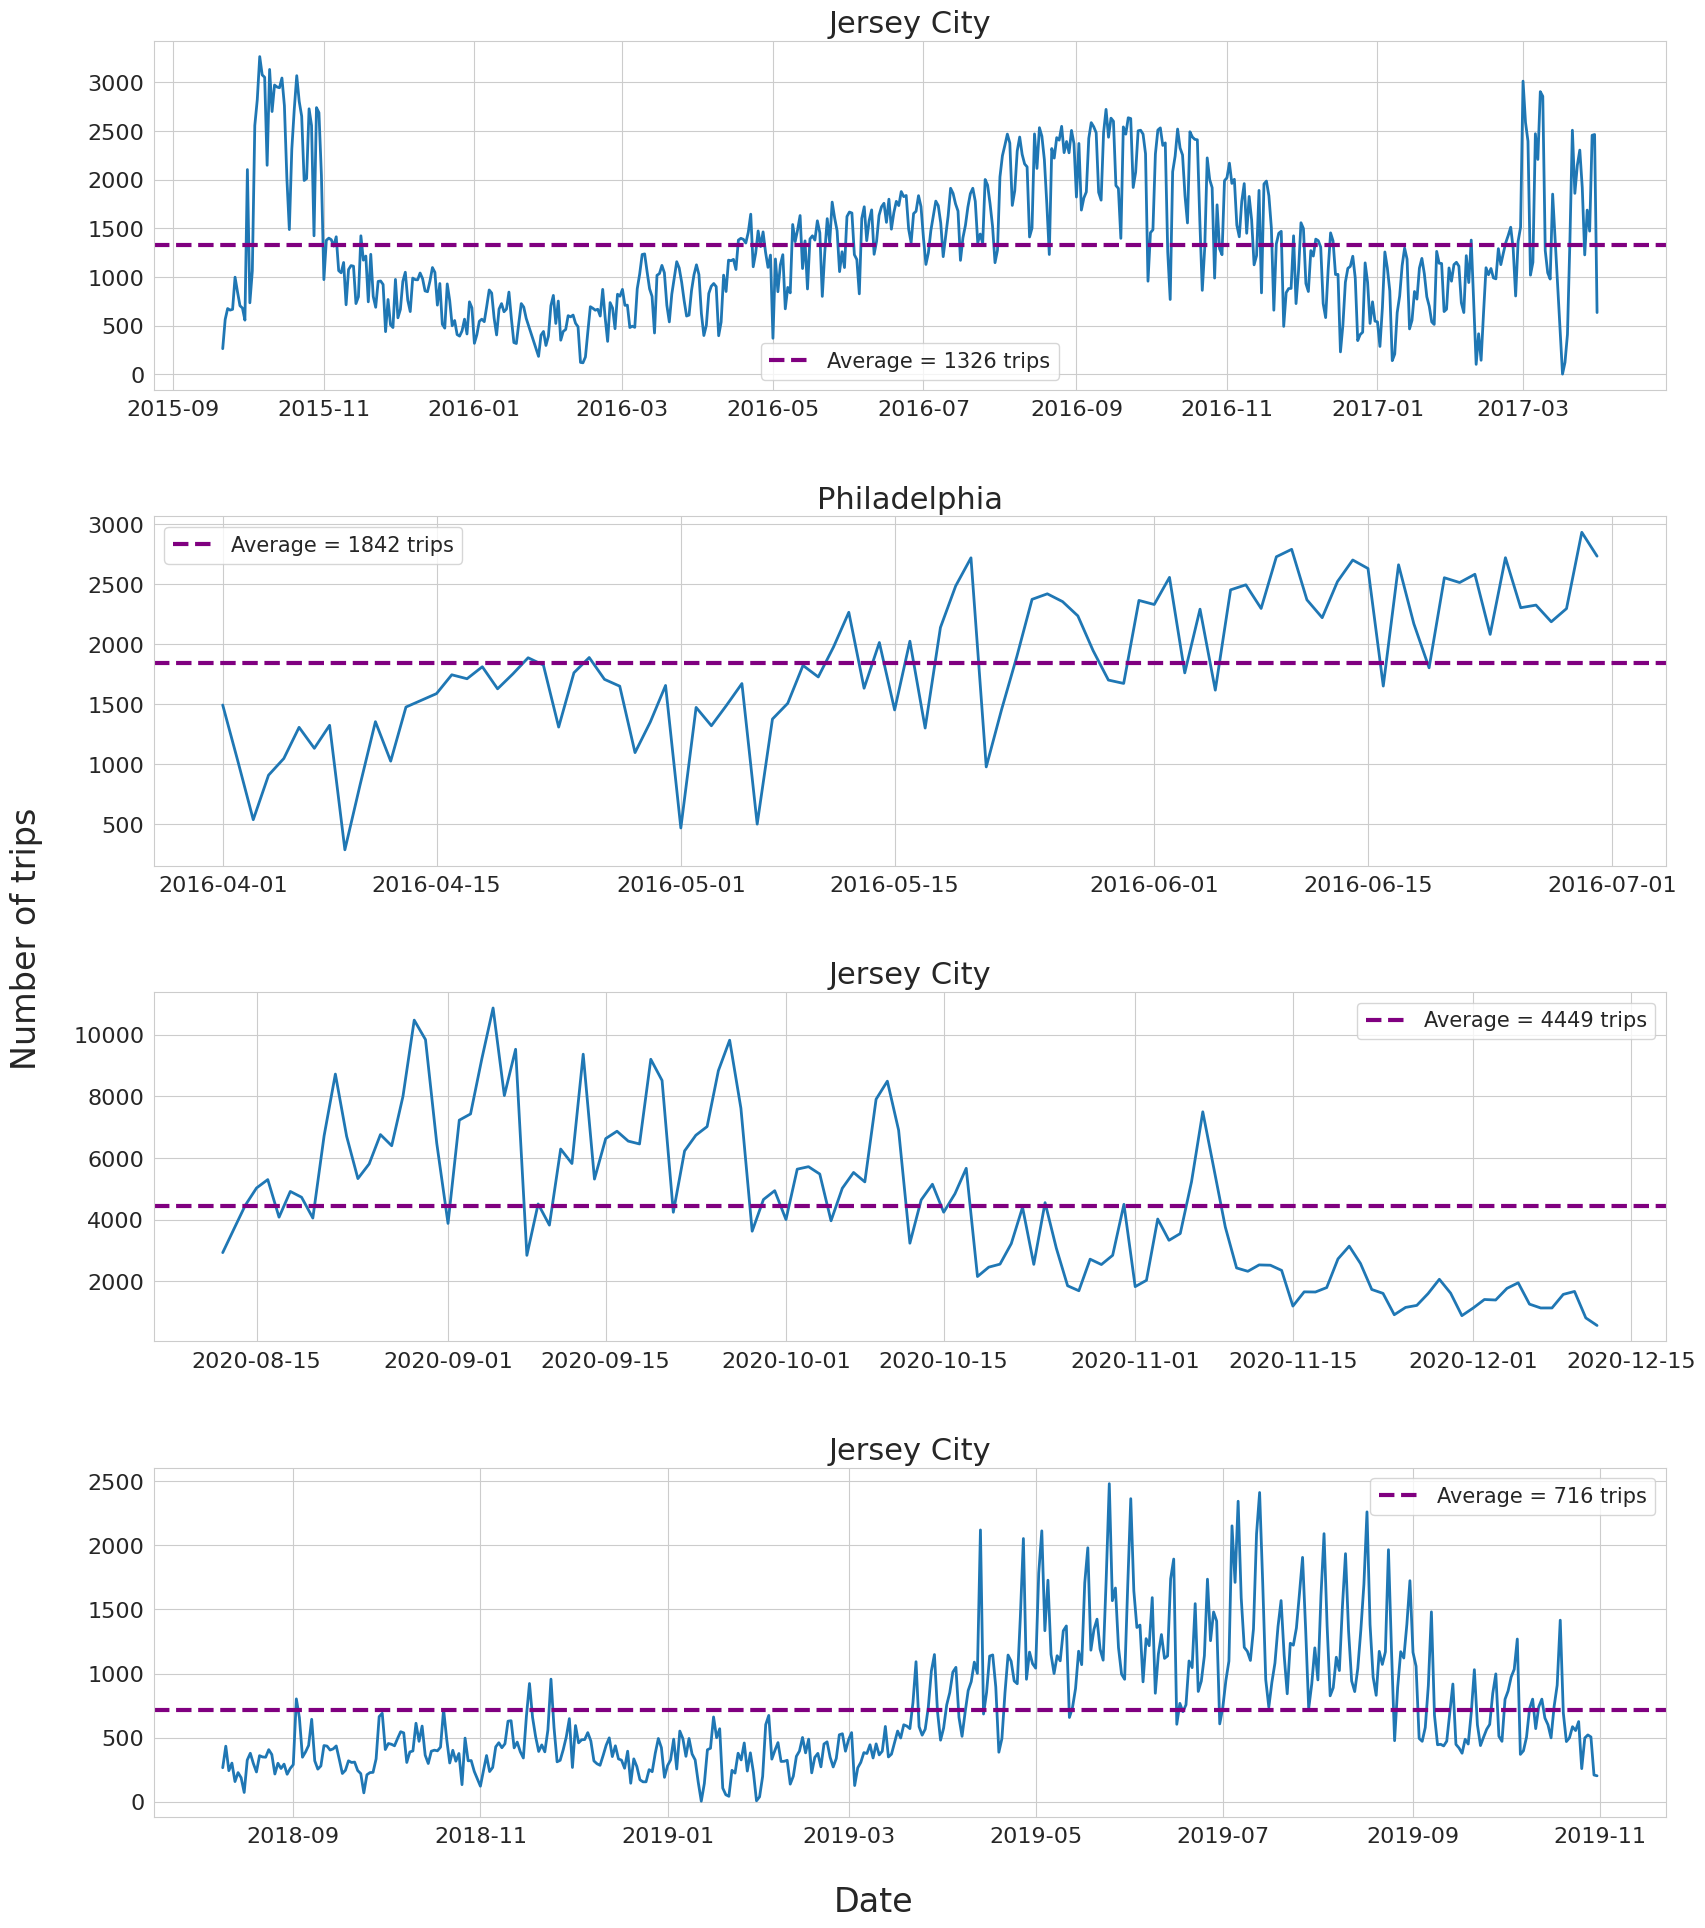

In [71]:
fig, axes = plt.subplots(nrows=4, figsize=(18, 20))
fig.tight_layout(pad = 7.0)
fig.subplots_adjust(left=0.1)
fig.supxlabel("Date", size = 24)
fig.supylabel("Number of trips", size = 24)

for ax, ntd, atpd, name in [[axes[0],ntd_jersey_city,atpd_jersey_city, "Jersey City"],
                            [axes[1],ntd_philadelphia,atpd_philadelphia, "Philadelphia"],
                            [axes[2],ntd_chicago,atpd_chicago, "Jersey City"],
                            [axes[3],ntd_louisville,atpd_louisville, "Jersey City"],]:
    plot = sns.lineplot(x="Date", y="Trips", data=ntd, linewidth=2, ax=ax)
    plot.axhline(atpd, linestyle="--", color="purple", label=f"Average = {atpd} trips", linewidth=3)
    plot.set(xlabel=None, ylabel=None)
    ax.set_title(name, size=22)
    ax.legend(prop={'size': 15})
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)

In [65]:
jersey_city["Day Of Week"] = jersey_city["Start Date"].dt.day_name()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tdw_jersey_city = jersey_city.groupby("Day Of Week")["Day Of Week"].agg(["count"]).reindex(cats).reset_index()
tdw_jersey_city.columns = ["Day of Week", "Trips"]
atdw_jersey_city = round(tdw_jersey_city["Trips"].mean())

philadelphia["day_of_week"] = philadelphia["start_date"].dt.day_name()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tdw_philadelphia = philadelphia.groupby("day_of_week")["day_of_week"].agg(["count"]).reindex(cats).reset_index()
tdw_philadelphia.columns = ["Day of Week", "Trips"]
atdw_philadelphia = round(tdw_philadelphia["Trips"].mean())

chicago["Day of Week"] = chicago["Start Date"].dt.day_name()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tdw_chicago = chicago.groupby("Day of Week")["Day of Week"].agg(["count"]).reindex(cats).reset_index()
tdw_chicago.columns = ["Day of Week", "Trips"]
atdw_chicago = round(tdw_chicago["Trips"].mean())

louisville["Day of Week"] = louisville["StartDate"].dt.day_name()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tdw_louisville = louisville.groupby("Day of Week")["Day of Week"].agg(["count"]).reindex(cats).reset_index()
tdw_louisville.columns = ["Day of Week", "Trips"]
atdw_louisville = round(tdw_louisville["Trips"].mean())

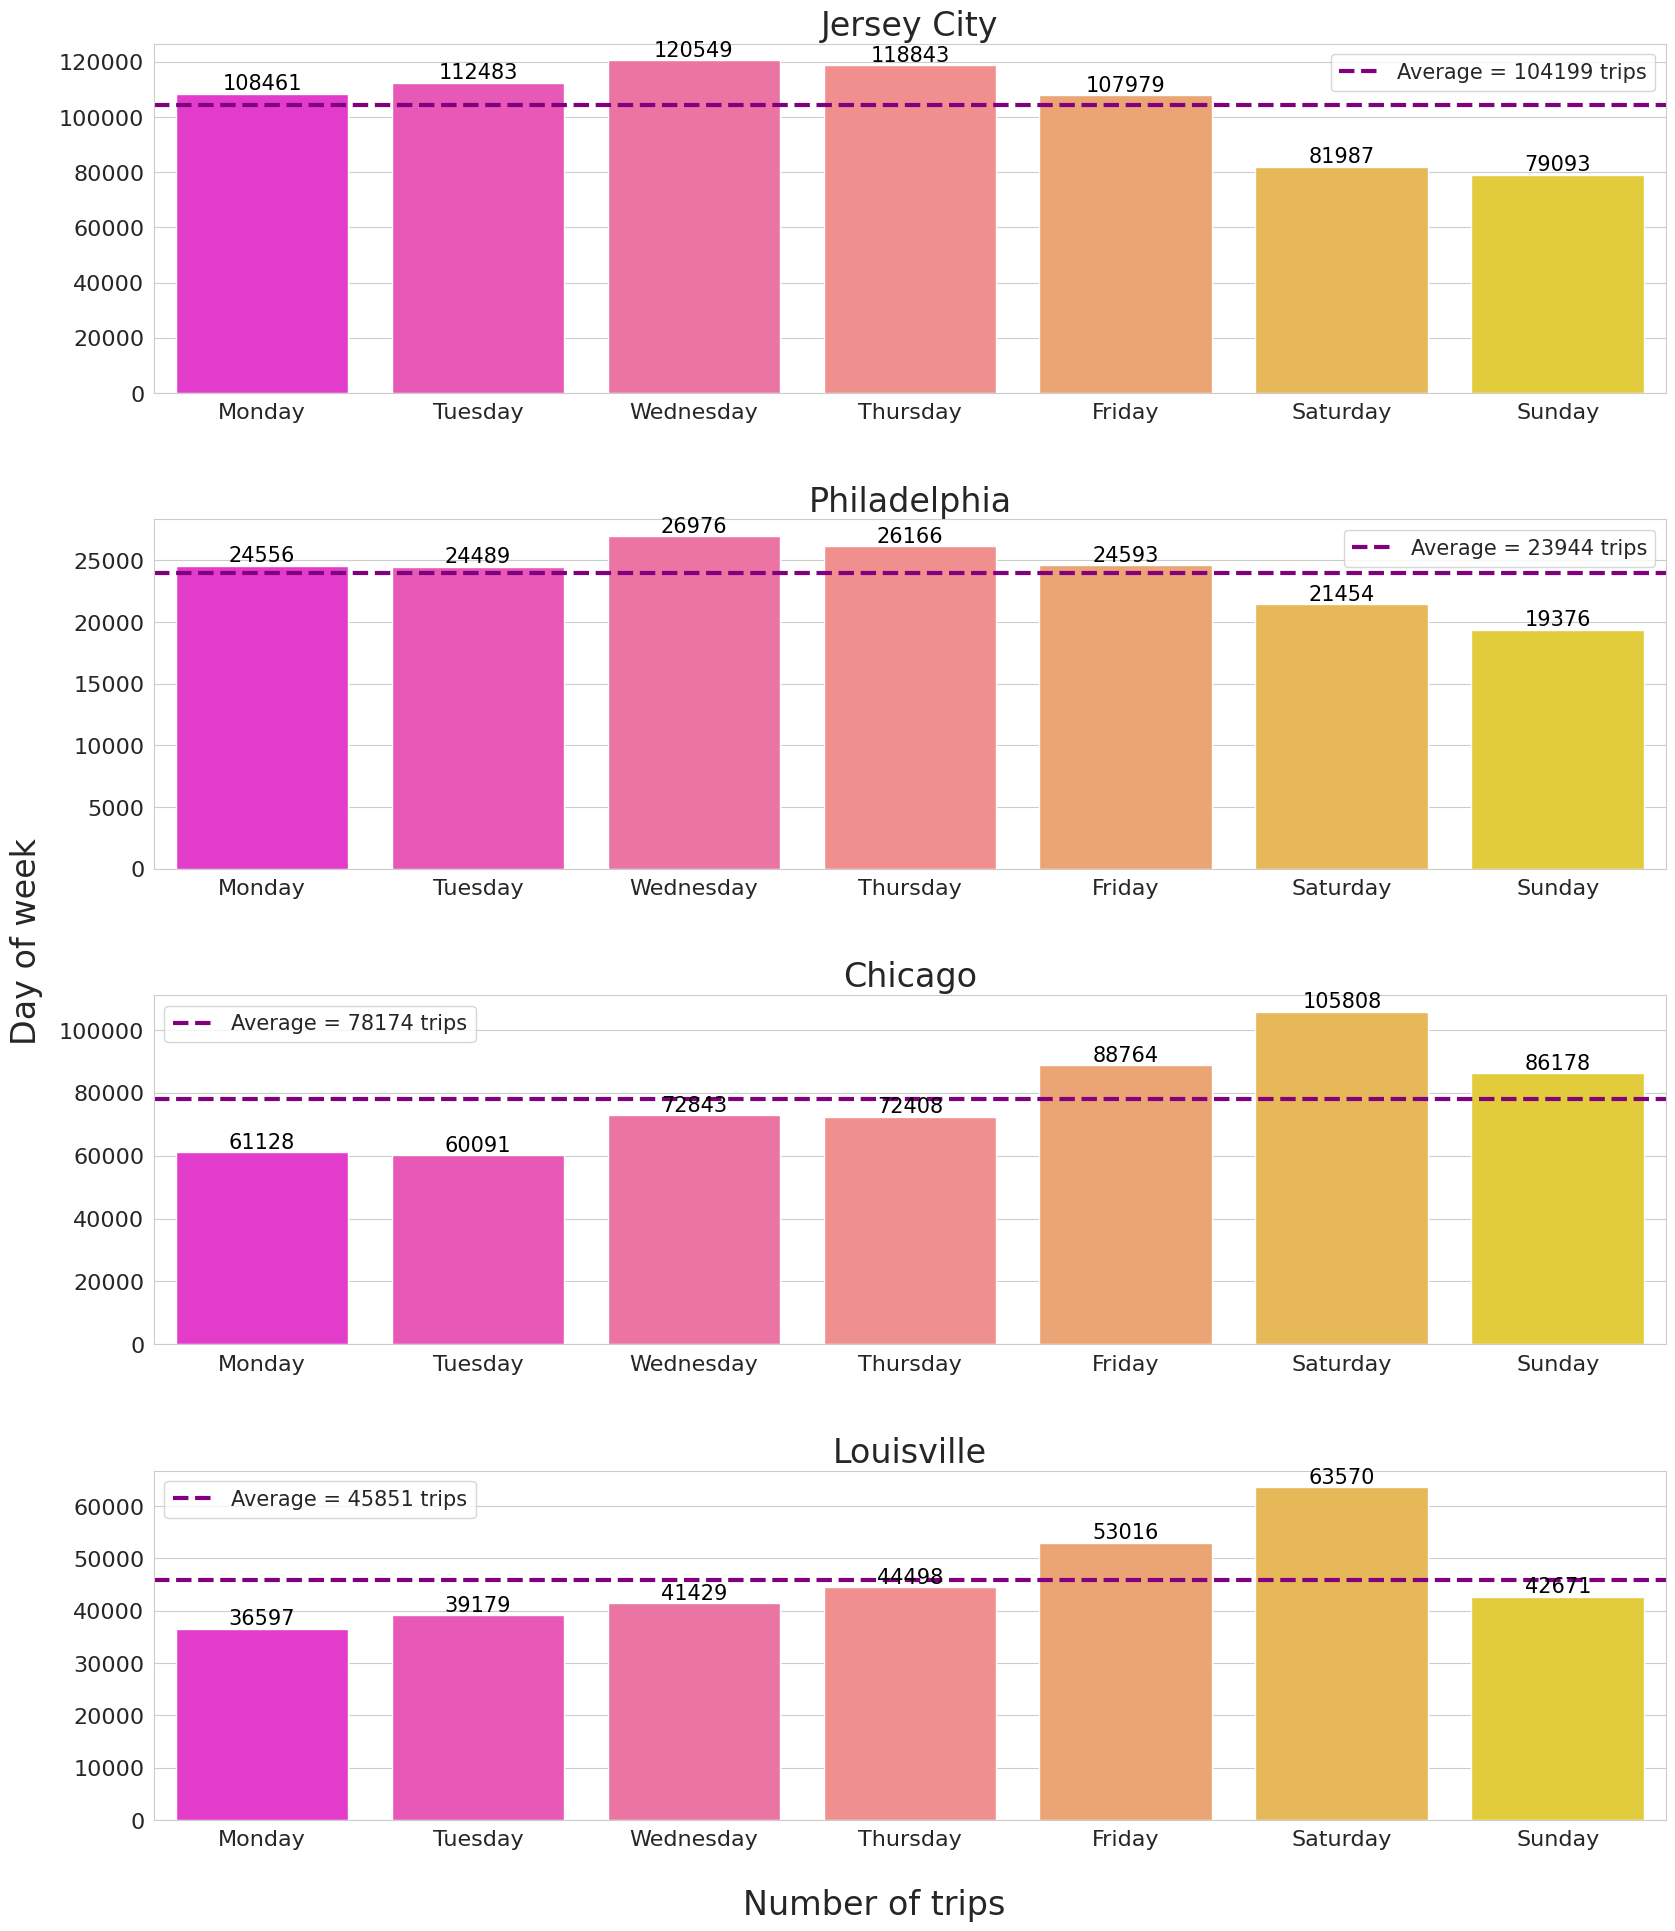

In [72]:
fig, axes = plt.subplots(nrows=4, figsize=(18, 20))
fig.tight_layout(pad = 7.0)
fig.subplots_adjust(left=0.1)
fig.supxlabel("Number of trips", size = 24)
fig.supylabel("Day of week", size = 24)

for ax, tdw, atdw, name in [[axes[0],tdw_jersey_city,atdw_jersey_city, "Jersey City"],
                            [axes[1],tdw_philadelphia,atdw_philadelphia, "Philadelphia"],
                            [axes[2],tdw_chicago,atdw_chicago, "Chicago"],
                            [axes[3],tdw_louisville,atdw_louisville, "Louisville"],]:
    plot = sns.barplot(x="Day of Week", y="Trips", data=tdw, palette="spring", ax=ax)

    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()),
            (p.get_x() + 0.4, p.get_height()), ha='center', va='bottom', color='black', size=15)
    plot.axhline(atdw, linestyle="--", color="purple", label=f"Average = {atdw} trips", linewidth=3)
    plot.set(xlabel=None, ylabel=None)
    ax.set_title(name, size=24)
    ax.legend(prop={'size': 15})
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)

In [75]:
jersey_city["Hour"] = pd.to_datetime(jersey_city["Start Time"]).dt.hour
thd_jersey_city = jersey_city["Hour"].value_counts().to_frame().reset_index()
thd_jersey_city.columns = ["Hour", "Trips"]
athd_jersey_city = round(thd_jersey_city["Trips"].mean())

philadelphia["hour"] = pd.to_datetime(philadelphia["start_time"]).dt.hour
thd_philadelphia = philadelphia["hour"].value_counts().to_frame().reset_index()
thd_philadelphia.columns = ["Hour", "Trips"]
athd_philadelphia = round(thd_philadelphia["Trips"].mean())

chicago["Hour"] = pd.to_datetime(chicago["Start Time"]).dt.hour
thd_chicago = chicago["Hour"].value_counts().to_frame().reset_index()
thd_chicago.columns = ["Hour", "Trips"]
athd_chicago = round(thd_chicago["Trips"].mean())

louisville["StartTime"] = np.where(louisville['StartTime'] == '24:00', '00:00', louisville["StartTime"])
louisville["Hour"] = pd.to_datetime(louisville["StartTime"]).dt.hour
thd_louisville = louisville["Hour"].value_counts().to_frame().reset_index()
thd_louisville.columns = ["Hour", "Trips"]
athd_louisville = round(thd_louisville["Trips"].mean())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


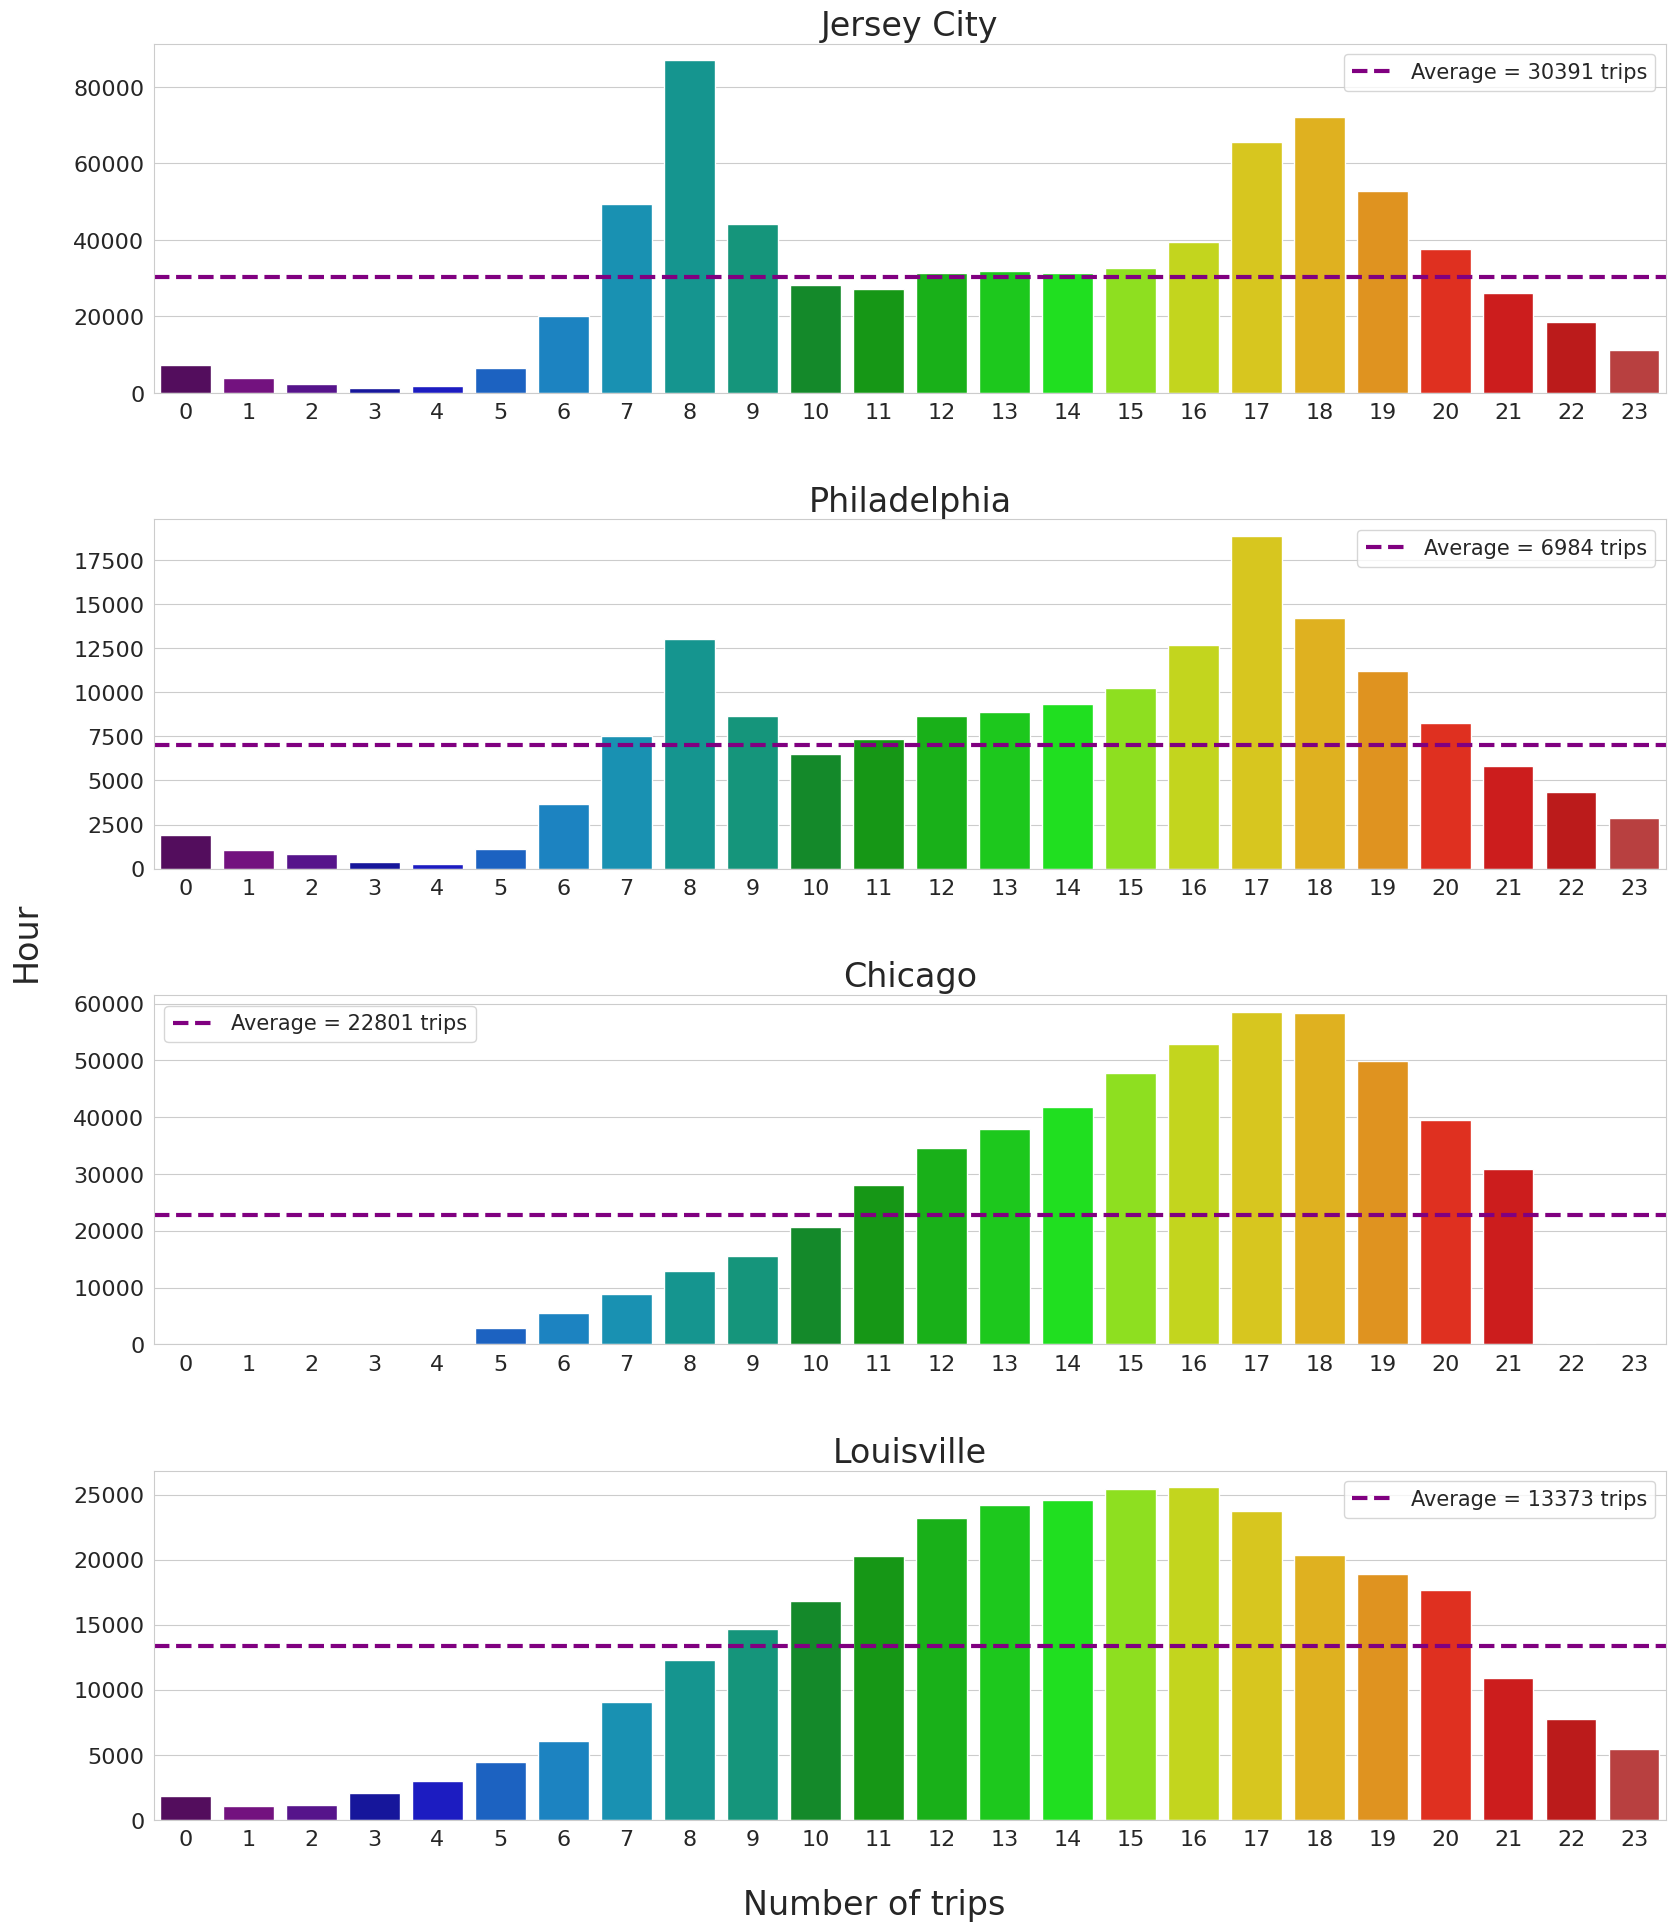

In [76]:
fig, axes = plt.subplots(nrows=4, figsize=(18, 20))
fig.tight_layout(pad = 7.0)
fig.subplots_adjust(left=0.1)
fig.supxlabel("Number of trips", size = 24)
fig.supylabel("Hour", size = 24)

for ax, thd, athd, name in [[axes[0],thd_jersey_city,athd_jersey_city, "Jersey City"],
                            [axes[1],thd_philadelphia,athd_philadelphia, "Philadelphia"],
                            [axes[2],thd_chicago,athd_chicago, "Chicago"],
                            [axes[3],thd_louisville,athd_louisville, "Louisville"]]:

    plot = sns.barplot(x="Hour", y="Trips", data=thd, palette="nipy_spectral", ax=ax)
    plot.axhline(athd, linestyle="--", color="purple", label=f"Average = {athd} trips", linewidth=3)
    plt.title(name, size=24)
    plt.legend(prop={'size': 15})
    plot.set(xlabel=None, ylabel=None)
    ax.set_title(name, size=24)
    ax.legend(prop={'size': 15})
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)